In [145]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [146]:
df =  pd.read_csv("sales_data_sample.csv", encoding='latin')
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [148]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [149]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [150]:
cols = ['ORDERNUMBER', 'STATUS', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME']
df = df.drop(cols, axis=1)
df.isnull().sum()

QUANTITYORDERED    0
PRICEEACH          0
ORDERLINENUMBER    0
SALES              0
ORDERDATE          0
QTR_ID             0
MONTH_ID           0
YEAR_ID            0
PRODUCTLINE        0
MSRP               0
PRODUCTCODE        0
COUNTRY            0
DEALSIZE           0
dtype: int64

In [151]:
print('COUNTRY')
print(df['COUNTRY'].unique())
print('PRODUCTLINE')
print(df['PRODUCTLINE'].unique())
print('DEALSIZE')
print(df['DEALSIZE'].unique())

COUNTRY
['USA' 'France' 'Norway' 'Australia' 'Finland' 'Austria' 'UK' 'Spain'
 'Sweden' 'Singapore' 'Canada' 'Japan' 'Italy' 'Denmark' 'Belgium'
 'Philippines' 'Germany' 'Switzerland' 'Ireland']
PRODUCTLINE
['Motorcycles' 'Classic Cars' 'Trucks and Buses' 'Vintage Cars' 'Planes'
 'Ships' 'Trains']
DEALSIZE
['Small' 'Medium' 'Large']


In [152]:
productline = pd.get_dummies(df['PRODUCTLINE'])
dealsize = pd.get_dummies(df['DEALSIZE'])
df = pd.concat([df,productline, dealsize], axis = 1)
df_drop  = ['COUNTRY','PRODUCTLINE','DEALSIZE']
df = df.drop(df_drop, axis=1)
df['PRODUCTCODE'] = pd.Categorical(df['PRODUCTCODE']).codes
df.drop('ORDERDATE', axis=1, inplace=True)

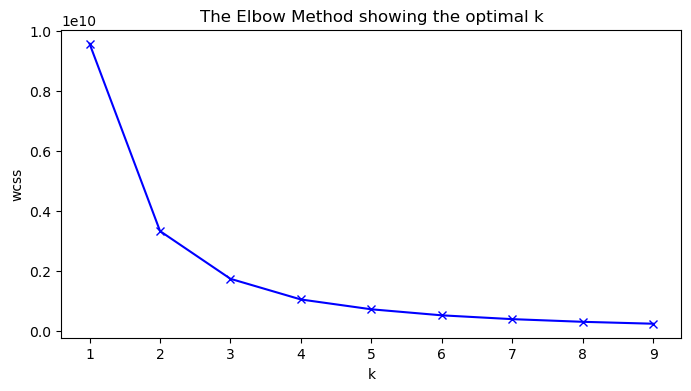

In [168]:
wcss = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    wcss.append(kmeanModel.inertia_)

plt.figure(figsize=(8,4)) 
plt.plot(K, wcss, 'bx-') 
plt.xlabel('k') 
plt.ylabel('wcss') 
plt.title('The Elbow Method showing the optimal k') 
plt.show() 

In [154]:
X_train = df.values
X_train.shape

(2823, 19)

In [169]:
model = KMeans (n_clusters=2, random_state=2)
model = model.fit(X_train) 
predictions = model.predict(X_train) 
predictions

array([1, 1, 1, ..., 0, 1, 1])

In [171]:
unique, counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,2)
counts_df = pd.DataFrame (counts, columns=['Cluster1', 'Cluster2'])
counts_df.head()

,Cluster1,Cluster2
0,796,2027


In [157]:
model.cluster_centers_

array([[4.20339196e+01, 9.95553015e+01, 6.10804020e+00, 5.92869373e+03,
        2.71105528e+00, 7.06658291e+00, 2.00384296e+03, 1.33287688e+02,
        3.82663317e+01, 4.81155779e-01, 1.09296482e-01, 6.65829146e-02,
        3.26633166e-02, 1.75879397e-02, 1.35678392e-01, 1.57035176e-01,
        1.97236181e-01, 8.02763819e-01, 2.22044605e-16],
       [3.23670449e+01, 7.74159102e+01, 6.60680809e+00, 2.62130668e+03,
        2.72027627e+00, 7.10261470e+00, 2.00380414e+03, 8.79245190e+01,
        5.98628515e+01, 2.88110508e-01, 1.20374938e-01, 1.24814998e-01,
        1.02614702e-01, 3.10804144e-02, 9.52146029e-02, 2.37789837e-01,
        1.38777878e-17, 3.67538234e-01, 6.32461766e-01]])

In [158]:
pca = PCA(n_components=2)
reduced_X = pd.DataFrame(pca.fit_transform(X_train),columns=['PCA1','PCA2'])
reduced_X

,PCA1,PCA2
0,-682.488323,-42.819535
1,-787.665502,-41.694991
2,330.732170,-26.481208
3,193.040232,-26.285766
4,1651.532874,-6.891196
...,...,...
2818,-1310.189713,45.876215
2819,423.701036,72.572416
2820,1862.595670,95.398858
2821,-1438.640580,51.465584


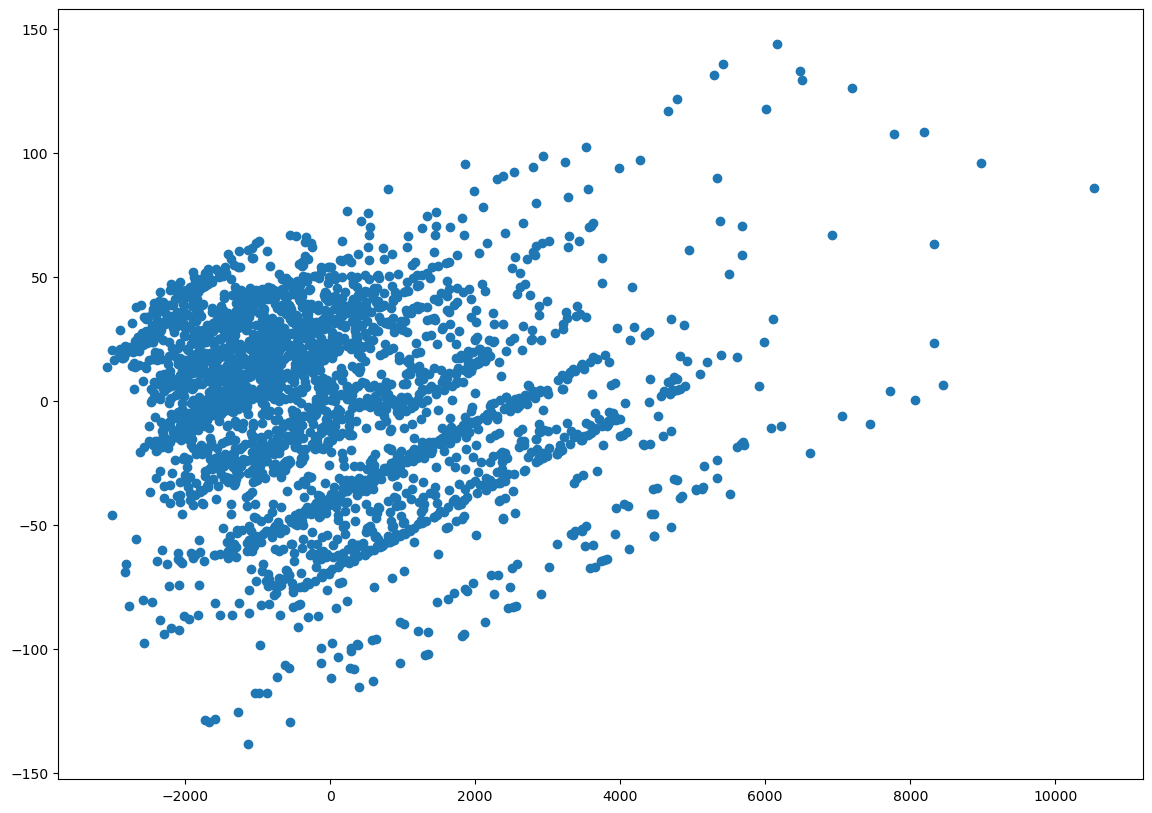

In [159]:
plt.figure(figsize=(14,10))
plt.scatter(reduced_X['PCA1'],reduced_X['PCA2']) 

In [160]:
reduced_centers = pca.transform(model.cluster_centers_)
reduced_centers

array([[ 2.37514105e+03, -7.09724025e-01],
       [-9.32714494e+02,  2.78707609e-01]])

In [161]:
reduced_X['Clusters'] = predictions
reduced_X

,PCA1,PCA2,Clusters
0,-682.488323,-42.819535,1
1,-787.665502,-41.694991,1
2,330.732170,-26.481208,1
3,193.040232,-26.285766,1
4,1651.532874,-6.891196,0
...,...,...,...
2818,-1310.189713,45.876215,1
2819,423.701036,72.572416,1
2820,1862.595670,95.398858,0
2821,-1438.640580,51.465584,1


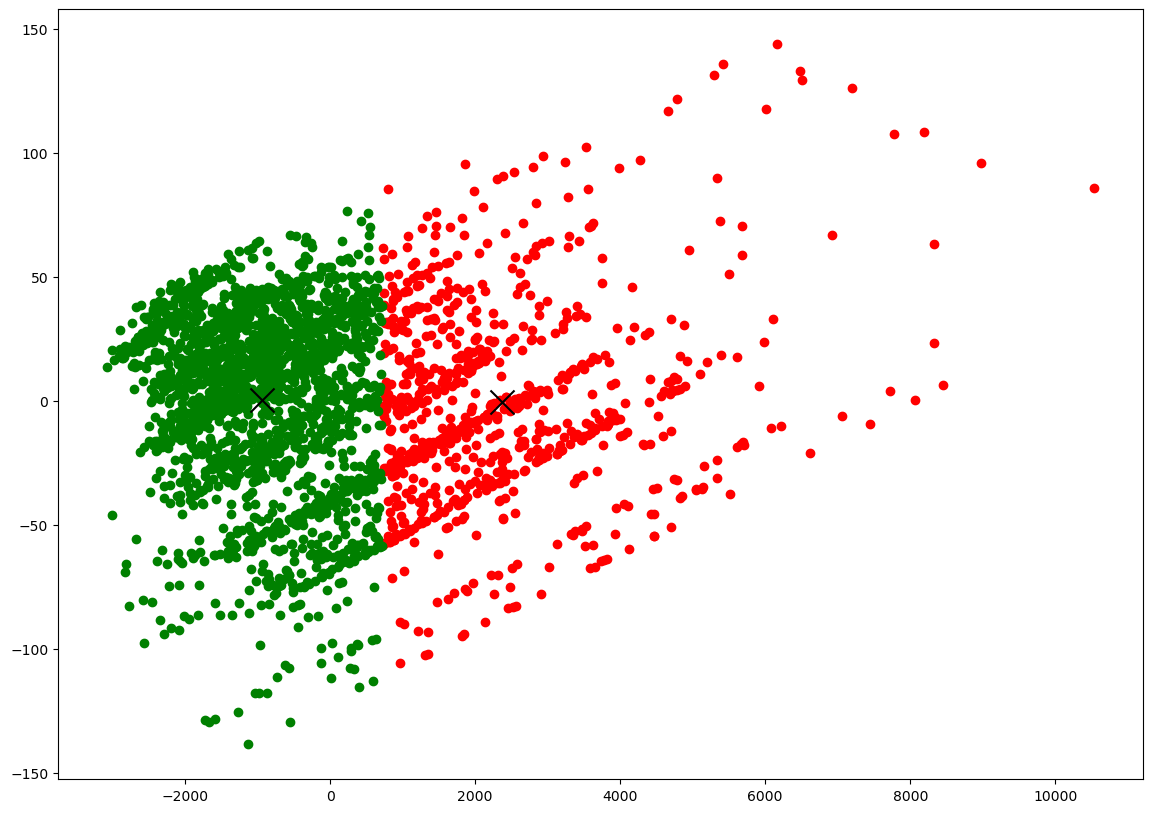

In [162]:
plt.figure(figsize=(14,10))
plt.scatter(reduced_X[reduced_X['Clusters'] == 0].loc[:,'PCA1'], reduced_X[reduced_X['Clusters'] == 0].loc[:,'PCA2'], color='red')
plt.scatter(reduced_X[reduced_X['Clusters'] == 1].loc[:,'PCA1'], reduced_X[reduced_X['Clusters'] == 1].loc[:,'PCA2'], color='green')
plt.scatter(reduced_X[reduced_X['Clusters'] == 2].loc[:,'PCA1'], reduced_X[reduced_X['Clusters'] == 2].loc[:,'PCA2'], color='blue')
plt.scatter(reduced_centers[:,0],reduced_centers[:,1],color='black',marker='x',s=300)

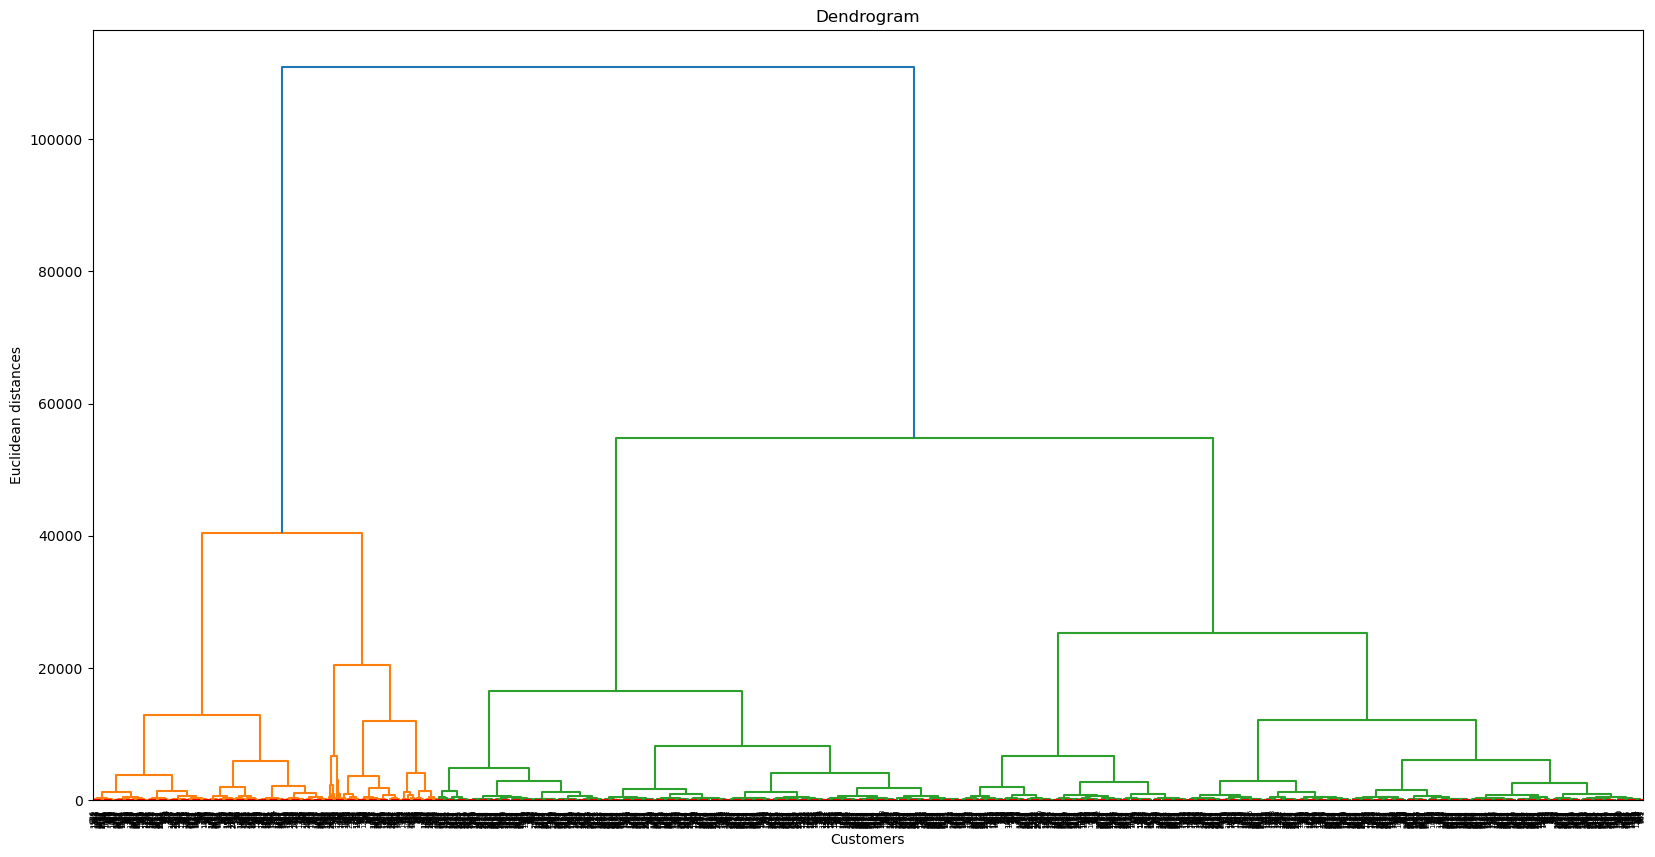

In [163]:
import scipy.cluster.hierarchy as sch 

plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(X_train, method = 'ward')) 
plt.title('Dendrogram') 
plt.xlabel('Customers') 
plt.ylabel('Euclidean distances')
plt.show()

In [164]:
from sklearn.cluster import AgglomerativeClustering

In [165]:
model = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
predictions = model.fit_predict(X_train)

In [166]:
unique, counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,2)
counts_df = pd.DataFrame (counts, columns=['Cluster1', 'Cluster2'])
counts_df.head()

,Cluster1,Cluster2
0,2194,629


In [167]:
model.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)